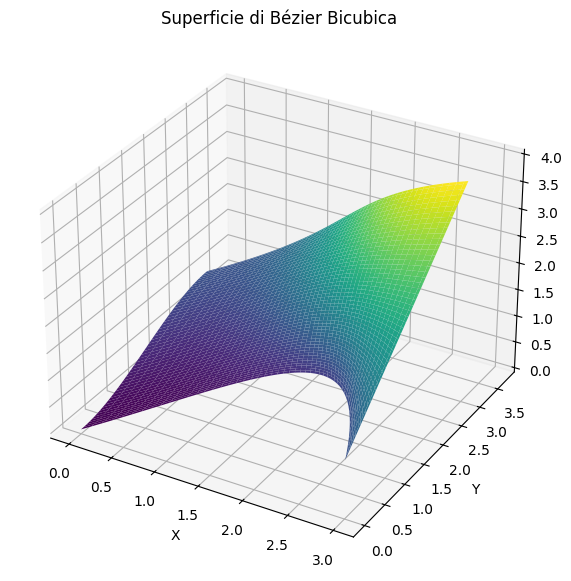

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funzione per la superficie di Bézier bicubica
def bezier_surface(u, v, P):
    """
    Calcola la superficie di Bézier bicubica data una griglia di punti di controllo P.
    P deve essere una matrice 4x4x3, dove i primi due indici sono i punti di controllo e l'ultimo è per le coordinate (x, y, z).
    """
    # Funzioni base di Bézier per u e v (bicubica)
    B_u = [(1 - u)**3, 3*u*(1 - u)**2, 3*u**2*(1 - u), u**3]
    B_v = [(1 - v)**3, 3*v*(1 - v)**2, 3*v**2*(1 - v), v**3]

    # Inizializzare la superficie
    S = np.zeros((u.shape[0], v.shape[0], 3))  # Superficie 3D

    for i in range(4):  # Per ogni punto di controllo in u
        for j in range(4):  # Per ogni punto di controllo in v
            S[:, :, 0] += B_u[i] * B_v[j] * P[i, j, 0]  # Coordinate x
            S[:, :, 1] += B_u[i] * B_v[j] * P[i, j, 1]  # Coordinate y
            S[:, :, 2] += B_u[i] * B_v[j] * P[i, j, 2]  # Coordinate z

    return S

# Punti di controllo della superficie di Bézier (4x4x3)
P = np.array([[[0, 0, 0], [1, 2, 0], [2, 3, 1], [3, 0, 1]],
              [[0, 1, 0], [1, 3, 0], [2, 2, 2], [3, 1, 2]],
              [[0, 2, 1], [1, 4, 1], [2, 1, 3], [3, 2, 3]],
              [[0, 3, 1], [1, 5, 1], [2, 2, 4], [3, 3, 4]]])

# Parametri u, v per la griglia
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)

u, v = np.meshgrid(u, v)

# Calcolare i punti sulla superficie di Bézier
S = bezier_surface(u, v, P)

# Creazione del grafico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tracciare la superficie
ax.plot_surface(S[:, :, 0], S[:, :, 1], S[:, :, 2], cmap='viridis')

# Impostazioni del grafico
ax.set_title("Superficie di Bézier Bicubica")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

